## Questions from last time

Geocoding:

* https://www.asg.ed.tum.de/gis/projekte/new-york-city-3d/
* https://www.sciencedirect.com/science/article/pii/S0034425720305010
* https://www.3dcitydb.org/3dcitydb/
* https://towardsdatascience.com/open-source-3d-semantical-building-models-in-2020-f47c91f6cd97

# More on ```pandas```

More the details and not so much the common things today

## Views vs. Copies

In [1]:
import pandas as pd
import numpy as np

Sometimes, operations in ```pandas``` return views, by that means if the view is altered, the original ```pandas``` object is altered.

In [2]:
df = pd.DataFrame({'a' :np.ones(5),
                   'b': np.ones(5),
                   'c': np.ones(5)}, dtype=int)

In [3]:
df

a  b  c
0  1  1  1
1  1  1  1
2  1  1  1
3  1  1  1
4  1  1  1

In the next step, we create a slice that is a view from the original dataset:

In [5]:
slice_of_df = df.iloc[2:4]
slice_of_df

a  b  c
2  1  1  1
3  1  1  1

Now we change a value in the original ```DataFrame```:

In [6]:
df.loc[2,'c'] = 0

In [10]:
df

a  b  c
0  1  1  1
1  1  1  1
2  1  1  0
3  1  1  1
4  1  1  1

In [9]:
slice_of_df._is_view

True

In [11]:
slice_of_df._is_copy

<weakref at 0x7fe66865cd10; to 'DataFrame' at 0x7fe6897d4c70>

So, what happens to the view?

In [12]:
slice_of_df

a  b  c
2  1  1  0
3  1  1  1

In [13]:
df.values.base is slice_of_df.values.base

True

**The view is altered, too!!**


So now let's concentrate on the next step:
**We do the same thing again!**

In [14]:
df

a  b  c
0  1  1  1
1  1  1  1
2  1  1  0
3  1  1  1
4  1  1  1

In [15]:
df.loc[3,'c'] = 1.1

In [16]:
df

a  b    c
0  1  1  1.0
1  1  1  1.0
2  1  1  0.0
3  1  1  1.1
4  1  1  1.0

In [17]:
slice_of_df

a  b  c
2  1  1  0
3  1  1  1

In [18]:
slice_of_df._is_view

True

In [19]:
slice_of_df._is_copy

<weakref at 0x7fe66865cd10; to 'DataFrame' at 0x7fe6897d4c70>

In [20]:
slice_of_df

a  b  c
2  1  1  0
3  1  1  1

The change didn't happen in our slice! It's a view?!

Strange effect happens since the whole column had to be casted and the connection to the original df will be lost at that point. So what happens if we do some changes in integers again?

In [21]:
df.values.base

array([[1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 0. , 1.1, 1. ]])

In [22]:
slice_of_df.values.base

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1]])

In [23]:
df.values.base is slice_of_df.values.base

False

Use that statement to test if the connection is alive

In [24]:
df.loc[2,'a'] = -4

In [25]:
df

a  b    c
0  1  1  1.0
1  1  1  1.0
2 -4  1  0.0
3  1  1  1.1
4  1  1  1.0

In [26]:
slice_of_df

a  b  c
2  1  1  0
3  1  1  1

So, what works in the beginning isn't working anymore. And this behaviour is kind of dangerous and should kept in mind. This happens every time the datatype of a column or row changes. So be careful too working row slices.

In [27]:
df

a  b    c
0  1  1  1.0
1  1  1  1.0
2 -4  1  0.0
3  1  1  1.1
4  1  1  1.0

In [28]:
slice_of_df

a  b  c
2  1  1  0
3  1  1  1

In [29]:
slice_of_df.iloc[1,1] = 12

/Users/franzbeier/anaconda3/envs/hondaworkshop/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/franzbeier/anaconda3/envs/hondaworkshop/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


But this isn't popping up the other way around!
But there's a clean way to deal with this and that's copies:

In [30]:
slice_of_df

a   b  c
2  1   1  0
3  1  12  1

In [31]:
df

a  b    c
0  1  1  1.0
1  1  1  1.0
2 -4  1  0.0
3  1  1  1.1
4  1  1  1.0

In [32]:
slice_of_df = slice_of_df.copy()
slice_of_df.iloc[1,2] = 12

In [33]:
slice_of_df

a   b   c
2  1   1   0
3  1  12  12

In [34]:
df

a  b    c
0  1  1  1.0
1  1  1  1.0
2 -4  1  0.0
3  1  1  1.1
4  1  1  1.0

In [35]:
test_df = slice_of_df.copy(deep=True)

In [36]:
test_df is slice_of_df

False

In [37]:
slice_of_df

a   b   c
2  1   1   0
3  1  12  12

But that problem isn't addressed completely I think. Maybe one should better always make copies to make clear it's just working as a copy. Especially since there are other operation where the same is happening: reshaping...

Usage of ```.query()``` always returns a copy

In [38]:
test_df.iloc[0,0] = 123

In [39]:
test_df.query('2 < index <= 13')

a   b   c
3  1  12  12

Test for similarity of ```DataFrame```s

In [40]:
pd.testing.assert_frame_equal(slice_of_df, test_df)

AssertionError: DataFrame.iloc[:, 0] (column name="a") are different

DataFrame.iloc[:, 0] (column name="a") values are different (50.0 %)
[index]: [2, 3]
[left]:  [1, 1]
[right]: [123, 1]

#### Deepcopy vs. Shallow Copy of ```DataFrame``` 

In [41]:
df1 = pd.DataFrame([1,2,3,4,5,6])

In [42]:
df1

0
0  1
1  2
2  3
3  4
4  5
5  6

In [43]:
id(df1)

140627295772576

In [44]:
df2 = df1

In [45]:
id(df2)

140627295772576

df1 and df2 have similar IDs

In [46]:
df3 = df1.copy()

In [47]:
df3

0
0  1
1  2
2  3
3  4
4  5
5  6

In [48]:
id(df3)

140627295772240

We get a new object with another id

In [49]:
df4 = df1.copy(deep=False)

In [50]:
id(df4)

140628125895360

We also get a new object with another id

Another strange behaviour in ```pandas```:

There are no real deep copies:

In [51]:
list1 = [0,1,2]
list2 = [5,6,7,8]

In [52]:
id(list1)

140627574260032

In [53]:
df1 = pd.DataFrame([[list1], [list2]], columns=['Test'])
df1

Test
0     [0, 1, 2]
1  [5, 6, 7, 8]

Get all the ids

In [54]:
df1.applymap(id)

Test
0  140627574260032
1  140627296410496

In [55]:
df2 = df1.copy(deep=False)

In [56]:
df2.applymap(id)

Test
0  140627574260032
1  140627296410496

unchanged ids

In [57]:
id(df1)

140627574240544

In [60]:
id(df2)

140628124333824

In [62]:
df3 = df1.copy(deep=True)

In [63]:
df3.applymap(id)

Test
0  140627574260032
1  140627296410496

unchanged ids???

In [64]:
df3.loc[0,'Test'].append(12)

In [65]:
df3

Test
0  [0, 1, 2, 12]
1   [5, 6, 7, 8]

In [60]:
df1

Test
0  [0, 1, 2, 12]
1   [5, 6, 7, 8]

So it's not a deep copy

In [66]:
from copy import deepcopy

In [67]:
df4 = deepcopy(df1)

In [68]:
df4.applymap(id)

Test
0  140627574260032
1  140627296410496

In [64]:
df4.loc[0,'Test'].append(4124)

In [65]:
df4

Test
0  [0, 1, 2, 12, 4124]
1         [5, 6, 7, 8]

In [66]:
df1

Test
0  [0, 1, 2, 12, 4124]
1         [5, 6, 7, 8]

More info on that topic:
https://github.com/pandas-dev/pandas/issues/17406

**In fact, putting mutable objects into a ```DataFrame``` is considered as an antipattern by ```pandas``` developers**

So why is there a deepcopy arg???

In [70]:
dict_1= {'Column 1': [1, 2, 3],
         'Column 2': [4, 5, 6]}

df1 = pd.DataFrame(dict_1, columns=['Column 1', 'Column 2'])

The deep copy case:

In [71]:
df1

Column 1  Column 2
0         1         4
1         2         5
2         3         6

In [72]:
df2 = df1.copy()
df2==df1

Column 1  Column 2
0      True      True
1      True      True
2      True      True

In [73]:
id(df1)

140627574319232

In [74]:
id(df2)

140627574243040

In [75]:
dict_new= {'Column 1': [1, 2, 3],
           'Column 2': [7, 8, 9]}

We update the ```DataFrame```:

In [76]:
df1.update(dict_new)

In [77]:
df1

Column 1  Column 2
0         1         7
1         2         8
2         3         9

In [78]:
df2 == df1

Column 1  Column 2
0      True     False
1      True     False
2      True     False

In [79]:
df1

Column 1  Column 2
0         1         7
1         2         8
2         3         9

In [80]:
df2

Column 1  Column 2
0         1         4
1         2         5
2         3         6

The new DataFrame is not changed when the original one changes.

##### And for a shallow copy?

Setting ```df``` again:

In [81]:
df1 = pd.DataFrame(dict_1, columns=['Column 1', 'Column 2'])

In [82]:
df2 = df1.copy(deep=False)

In [83]:
df2==df1

Column 1  Column 2
0      True      True
1      True      True
2      True      True

In [84]:
id(df1)

140628125895696

In [85]:
id(df2)

140628125896512

In [86]:
df1.update(dict_new)

In [87]:
df2 == df1

Column 1  Column 2
0      True      True
1      True      True
2      True      True

So df2 and df1 are connected!

Until...

In [88]:
df2.loc[1, 'Column 1'] = 'A'

In [89]:
df2

Column 1  Column 2
0        1         7
1        A         8
2        3         9

In [90]:
df2 == df1

Column 1  Column 2
0      True      True
1     False      True
2      True      True

they lose their connection as a slice view.

In [91]:
df1.values.base is df2.values.base

False

# Concat, Merge and Join


Sometimes the overlap or just the combination of a DataFrame are of interest

### Let's start with ```.concat()```

We create two dataframes:

In [92]:
df1 = pd.DataFrame({'a':np.ones(5),
                    'b': np.ones(5),
                    'c': np.ones(5)}, dtype=int)

df2 = pd.DataFrame({'c': 2*np.ones(5),
                    'd': 2*np.ones(5),
                    'e': 2*np.ones(5)}, index=np.arange(2,7) ,dtype=int)

In [93]:
df1

a  b  c
0  1  1  1
1  1  1  1
2  1  1  1
3  1  1  1
4  1  1  1

In [94]:
df2

c  d  e
2  2  2  2
3  2  2  2
4  2  2  2
5  2  2  2
6  2  2  2

In [95]:
pd.concat([df2,df1])

c    d    e    a    b
2  2  2.0  2.0  NaN  NaN
3  2  2.0  2.0  NaN  NaN
4  2  2.0  2.0  NaN  NaN
5  2  2.0  2.0  NaN  NaN
6  2  2.0  2.0  NaN  NaN
0  1  NaN  NaN  1.0  1.0
1  1  NaN  NaN  1.0  1.0
2  1  NaN  NaN  1.0  1.0
3  1  NaN  NaN  1.0  1.0
4  1  NaN  NaN  1.0  1.0

In [96]:
a = pd.concat([df2,df1])

In [98]:
a['c'].loc[2]

2    2
2    1
Name: c, dtype: int64

In [99]:
pd.concat([df1,df2], axis=1)

a    b    c    c    d    e
0  1.0  1.0  1.0  NaN  NaN  NaN
1  1.0  1.0  1.0  NaN  NaN  NaN
2  1.0  1.0  1.0  2.0  2.0  2.0
3  1.0  1.0  1.0  2.0  2.0  2.0
4  1.0  1.0  1.0  2.0  2.0  2.0
5  NaN  NaN  NaN  2.0  2.0  2.0
6  NaN  NaN  NaN  2.0  2.0  2.0

In [100]:
pd.concat([df1,df2], axis=0)

a    b  c    d    e
0  1.0  1.0  1  NaN  NaN
1  1.0  1.0  1  NaN  NaN
2  1.0  1.0  1  NaN  NaN
3  1.0  1.0  1  NaN  NaN
4  1.0  1.0  1  NaN  NaN
2  NaN  NaN  2  2.0  2.0
3  NaN  NaN  2  2.0  2.0
4  NaN  NaN  2  2.0  2.0
5  NaN  NaN  2  2.0  2.0
6  NaN  NaN  2  2.0  2.0

So that happens when we just concat DataFrames, they're stacked.

But if we want them just temporarily to be stacked and now are scared of views and copies:
*```DataFrames```-concats can also have keys.*

In [101]:
df = pd.concat([df1,df2], keys=['df_1', 'df_2'], axis=1)
df

df_1           df_2          
     a    b    c    c    d    e
0  1.0  1.0  1.0  NaN  NaN  NaN
1  1.0  1.0  1.0  NaN  NaN  NaN
2  1.0  1.0  1.0  2.0  2.0  2.0
3  1.0  1.0  1.0  2.0  2.0  2.0
4  1.0  1.0  1.0  2.0  2.0  2.0
5  NaN  NaN  NaN  2.0  2.0  2.0
6  NaN  NaN  NaN  2.0  2.0  2.0

In [103]:
df['df_1']

a    b    c
0  1.0  1.0  1.0
1  1.0  1.0  1.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  NaN  NaN  NaN
6  NaN  NaN  NaN

The index doubled! That's also working with rows if we concat in the other dimension:

In [104]:
pd.concat([df1,df2], keys=['df_1', 'df_2'], axis=0)

a    b  c    d    e
df_1 0  1.0  1.0  1  NaN  NaN
     1  1.0  1.0  1  NaN  NaN
     2  1.0  1.0  1  NaN  NaN
     3  1.0  1.0  1  NaN  NaN
     4  1.0  1.0  1  NaN  NaN
df_2 2  NaN  NaN  2  2.0  2.0
     3  NaN  NaN  2  2.0  2.0
     4  NaN  NaN  2  2.0  2.0
     5  NaN  NaN  2  2.0  2.0
     6  NaN  NaN  2  2.0  2.0

After this is done it's very easy to seperate them from each other, just refer to the given keys.

In [105]:
df_all = pd.concat([df1,df2], keys=['df_1', 'df_2'], axis=0)

In [106]:
df_all.loc['df_1']

a    b  c   d   e
0  1.0  1.0  1 NaN NaN
1  1.0  1.0  1 NaN NaN
2  1.0  1.0  1 NaN NaN
3  1.0  1.0  1 NaN NaN
4  1.0  1.0  1 NaN NaN

But the new columns are remaining in the ```DataFrame.```

Also can be done by append.

In [107]:
df1.append(df2)

a    b  c    d    e
0  1.0  1.0  1  NaN  NaN
1  1.0  1.0  1  NaN  NaN
2  1.0  1.0  1  NaN  NaN
3  1.0  1.0  1  NaN  NaN
4  1.0  1.0  1  NaN  NaN
2  NaN  NaN  2  2.0  2.0
3  NaN  NaN  2  2.0  2.0
4  NaN  NaN  2  2.0  2.0
5  NaN  NaN  2  2.0  2.0
6  NaN  NaN  2  2.0  2.0

In [108]:
a = df2.append(df1)
a

c    d    e    a    b
2  2  2.0  2.0  NaN  NaN
3  2  2.0  2.0  NaN  NaN
4  2  2.0  2.0  NaN  NaN
5  2  2.0  2.0  NaN  NaN
6  2  2.0  2.0  NaN  NaN
0  1  NaN  NaN  1.0  1.0
1  1  NaN  NaN  1.0  1.0
2  1  NaN  NaN  1.0  1.0
3  1  NaN  NaN  1.0  1.0
4  1  NaN  NaN  1.0  1.0

In [109]:
a['c'][2]

2    2
2    1
Name: c, dtype: int64

The index isn't altered this time.

The index can also be ignored:

In [110]:
df1.append(df2, ignore_index=True)

a    b  c    d    e
0  1.0  1.0  1  NaN  NaN
1  1.0  1.0  1  NaN  NaN
2  1.0  1.0  1  NaN  NaN
3  1.0  1.0  1  NaN  NaN
4  1.0  1.0  1  NaN  NaN
5  NaN  NaN  2  2.0  2.0
6  NaN  NaN  2  2.0  2.0
7  NaN  NaN  2  2.0  2.0
8  NaN  NaN  2  2.0  2.0
9  NaN  NaN  2  2.0  2.0

```.concat()``` also works with Series and other ```DataFrames``` of the same length.

### Let's take a look into ```.merge()```

Let's do database like operations:

In [111]:
left = pd.DataFrame(
    {
    "key": ["K0", "K1", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
    "key": ["K0", "K1", "K2", "K3"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
    }
)


https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join

In [112]:
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [113]:
right

key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

In [114]:
result = pd.merge(left, right)

In [115]:
result

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3

But this was just the most easy example. Merge is conditional and the conditions can be specified such as if you work with databases.

One more complicated example:

In [116]:
left = pd.DataFrame(
    {
    "key1": ["K0", "K0", "K1", "K2"],
    "key2": ["K0", "K1", "K0", "K1"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
    "key1": ["K0", "K1", "K1", "K2"],
    "key2": ["K0", "K0", "K0", "K0"],
    "C": ["C0", "C1", "C2", "C3"],
    "D": ["D0", "D1", "D2", "D3"],
    }
)



In [117]:
left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

In [118]:
right

key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3

In [119]:
pd.merge(left,right)

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

In [121]:
pd.merge(left, right, on=['key1'])

key1 key2_x   A   B key2_y   C   D
0   K0     K0  A0  B0     K0  C0  D0
1   K0     K1  A1  B1     K0  C0  D0
2   K1     K0  A2  B2     K0  C1  D1
3   K1     K0  A2  B2     K0  C2  D2
4   K2     K1  A3  B3     K0  C3  D3

* So it's a conditional merge on identical keys specified in the ```on``` argument. 
* There's also the ```how``` argument. This argument defines wich values are taken to the resulting table.

In [122]:
left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

In [123]:
right

key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3

In [124]:
pd.merge(left, right, on=['key1', 'key2'], how='left')

key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN

In [125]:
pd.merge(left, right, on=['key1', 'key2'], how='right')

key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3

default is ```how='inner'```

But what happens if we merge with just one key?

In [130]:
pd.merge(left, right)

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

In [131]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3

The documentation compares the behaviour to SQL:

https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join

```.join``` is just the method of the dataframe that represents the merge operation, but very useful for the creation of multiindex ```DataFrame```s

A very useful methods to get a fast overview what changed in operating on ```DataFrames``` is ```.compare()```.

In [132]:
new_left = left.copy()

In [133]:
new_left is left

False

In [134]:
left.loc[2,'B'] = 0

In [135]:
new_left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

In [136]:
left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2   0
3   K2   K1  A3  B3

In [137]:
left.compare(new_left)

B      
  self other
2    0    B2

In [138]:
pd.testing.assert_frame_equal(left, new_left)

AssertionError: DataFrame.iloc[:, 3] (column name="B") are different

DataFrame.iloc[:, 3] (column name="B") values are different (25.0 %)
[index]: [0, 1, 2, 3]
[left]:  [B0, B1, 0, B3]
[right]: [B0, B1, B2, B3]

# Time Series Operations in ```DataFrame```s

## Simple Operations and resampling

Ok, we already saw time series earlier. In fact it's just a table with mostly equally spaced dates.

It's easy to create them manually:

In [2]:
import pandas as pd

In [3]:
idx = pd.date_range("2022-02-03", periods=12, freq="H")
ts = pd.Series(range(len(idx)), index=idx)

In [4]:
ts

2022-02-03 00:00:00     0
2022-02-03 01:00:00     1
2022-02-03 02:00:00     2
2022-02-03 03:00:00     3
2022-02-03 04:00:00     4
2022-02-03 05:00:00     5
2022-02-03 06:00:00     6
2022-02-03 07:00:00     7
2022-02-03 08:00:00     8
2022-02-03 09:00:00     9
2022-02-03 10:00:00    10
2022-02-03 11:00:00    11
Freq: H, dtype: int64

In [6]:
ts.index[0]

Timestamp('2022-02-03 00:00:00', freq='H')

Since datetime is also native in ```DataFrame```, time series can be resampled:

In [7]:
ts_rs = ts.resample('2H')

In [8]:
ts_rs

In [9]:
ts_rs = ts.resample('2H').asfreq()

In [10]:
ts_rs

2022-02-03 00:00:00     0
2022-02-03 02:00:00     2
2022-02-03 04:00:00     4
2022-02-03 06:00:00     6
2022-02-03 08:00:00     8
2022-02-03 10:00:00    10
Freq: 2H, dtype: int64

In [11]:
ts.resample('2H').sum()

2022-02-03 00:00:00     1
2022-02-03 02:00:00     5
2022-02-03 04:00:00     9
2022-02-03 06:00:00    13
2022-02-03 08:00:00    17
2022-02-03 10:00:00    21
Freq: 2H, dtype: int64

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib widget

<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
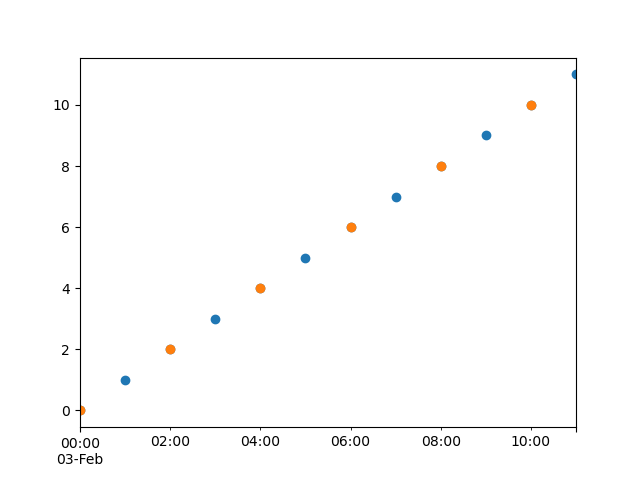

In [14]:
ts.plot(style=['o'])
ts_rs.plot(style=['o'])

But that gives us just an object, we have to specify what should be done with the values in the new sample time steps.

In [15]:
ts_rs = ts.resample('15min').asfreq()
ts_rs.head()

2022-02-03 00:00:00    0.0
2022-02-03 00:15:00    NaN
2022-02-03 00:30:00    NaN
2022-02-03 00:45:00    NaN
2022-02-03 01:00:00    1.0
Freq: 15T, dtype: float64

In [16]:
ts_rs = ts.resample('15min').ffill()
ts_rs.head()

2022-02-03 00:00:00    0
2022-02-03 00:15:00    0
2022-02-03 00:30:00    0
2022-02-03 00:45:00    0
2022-02-03 01:00:00    1
Freq: 15T, dtype: int64

In [18]:
ts_rs = ts.resample('15min').bfill()
ts_rs.head()

2022-02-03 00:00:00    0
2022-02-03 00:15:00    1
2022-02-03 00:30:00    1
2022-02-03 00:45:00    1
2022-02-03 01:00:00    1
Freq: 15T, dtype: int64

In [19]:
ts.plot(style=['o'])
ts_rs.plot(style=['o'])

<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Or customized resampling with apply.

In [20]:
def custom_resampler(items):
    return np.sum(items) + 1

In [24]:
import numpy as np
ts.resample('6H').apply(custom_resampler)

2022-02-03 00:00:00    16
2022-02-03 06:00:00    52
Freq: 6H, dtype: int64

```Series``` and ```DataFrame```can be created also in time ranges 

In [25]:
period_series = pd.Series(pd.period_range("1/1/2021", freq="M", periods=10))
period_series

0    2021-01
1    2021-02
2    2021-03
3    2021-04
4    2021-05
5    2021-06
6    2021-07
7    2021-08
8    2021-09
9    2021-10
dtype: period[M]

In [26]:
date_series = pd.Series(pd.date_range("1/1/2021", freq="M", periods=10))
date_series

0   2021-01-31
1   2021-02-28
2   2021-03-31
3   2021-04-30
4   2021-05-31
5   2021-06-30
6   2021-07-31
7   2021-08-31
8   2021-09-30
9   2021-10-31
dtype: datetime64[ns]

What's the difference? 
* ```period_range``` represents a range of periods
* ```date_range``` represents a range of dates

In [27]:
date_series[5]

Timestamp('2021-06-30 00:00:00')

In [28]:
period=period_series[5]

In [29]:
period

Period('2021-06', 'M')

In [30]:
period.start_time

Timestamp('2021-06-01 00:00:00')

In [31]:
period.end_time

Timestamp('2021-06-30 23:59:59.999999999')

But these are convertible!

In [32]:
rng = pd.date_range("1/1/2021", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)


In [33]:
ts

2021-01-31    0.243474
2021-02-28   -0.142494
2021-03-31   -0.404023
2021-04-30    1.186920
2021-05-31    0.722405
Freq: M, dtype: float64

In [34]:
ts.to_period()

2021-01    0.243474
2021-02   -0.142494
2021-03   -0.404023
2021-04    1.186920
2021-05    0.722405
Freq: M, dtype: float64

In [35]:
ts.to_period().index[0].end_time

Timestamp('2021-01-31 23:59:59.999999999')

I already showed indexing in time stamps.

And localization with

In [36]:
ts.tz_localize('Europe/Berlin')

2021-01-31 00:00:00+01:00    0.243474
2021-02-28 00:00:00+01:00   -0.142494
2021-03-31 00:00:00+02:00   -0.404023
2021-04-30 00:00:00+02:00    1.186920
2021-05-31 00:00:00+02:00    0.722405
dtype: float64

It also has the daylight saving time in mind.

pandas datetime provides a lot of additional helping functionality such as business days and alternative origins.

## Real Data in Time Series

In [37]:
import pandas as pd
df = pd.read_csv('sample_data/time_series_example.csv', parse_dates=['utc_timestamp']) #120MB

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201604 entries, 0 to 201603
Data columns (total 61 columns):
 #   Column                                           Non-Null Count   Dtype              
---  ------                                           --------------   -----              
 0   utc_timestamp                                    201604 non-null  datetime64[ns, UTC]
 1   cet_cest_timestamp                               201604 non-null  object             
 2   AT_load_actual_entsoe_transparency               201598 non-null  float64            
 3   AT_load_forecast_entsoe_transparency             201598 non-null  float64            
 4   AT_price_day_ahead                               131378 non-null  float64            
 5   AT_solar_generation_actual                       201352 non-null  float64            
 6   AT_wind_onshore_generation_actual                201406 non-null  float64            
 7   BE_load_actual_entsoe_transparency               201598 non-null 

In [39]:
df.describe()

AT_load_actual_entsoe_transparency  \
count                       201598.000000   
mean                          7070.161704   
std                           1403.676483   
min                            615.200000   
25%                           5938.800000   
50%                           7032.400000   
75%                           8080.800000   
max                          10836.000000   

       AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
count                         201598.000000       131378.000000   
mean                            7039.857678           33.947254   
std                             1357.674902           16.815854   
min                             3731.650000         -149.990000   
25%                             5940.000000           23.960000   
50%                             7019.120000           33.000000   
75%                             7987.442500           43.010000   
max                            11667.590000          977.740000   

       AT_solar_generation_actual  AT_wind_onshore_generation_actual  \
count               201352.000000                      201406.000000   
mean                   135.283656                         729.651345   
std                    199.645788                         693.810792   
min                      0.000000                           0.000000   
25%                      0.000000                         160.315000   
50%                     16.000000                         492.000000   
75%                    224.000000                        1140.000000   
max                   1172.000000                        2992.000000   

       BE_load_actual_entsoe_transparency  \
count                       201598.000000   
mean                          9808.396916   
std                           1398.512250   
min                           6129.490000   
25%                           8703.340000   
50%                           9809.285000   
75%                          10856.987500   
max                          13815.370000   

       BE_load_forecast_entsoe_transparency  \
count                         201502.000000   
mean                            9759.333258   
std                             1384.276280   
min                             6500.050000   
25%                             8666.115000   
50%                             9755.595000   
75%                            10815.052500   
max                            13653.090000   

       DE_load_actual_entsoe_transparency  \
count                       201598.000000   
mean                         55492.589700   
std                          10041.148871   
min                          29158.120000   
25%                          47099.780000   
50%                          55117.400000   
75%                          64337.655000   
max                          77852.940000   

       DE_load_forecast_entsoe_transparency  DE_solar_capacity  ...  \
count                         201502.000000      175199.000000  ...   
mean                           54791.506975       42378.044395  ...   
std                             9523.623592        4306.349752  ...   
min                            28675.410000       37248.000000  ...   
25%                            46962.280000       38810.000000  ...   
50%                            54749.695000       40941.000000  ...   
75%                            62901.085000       46092.000000  ...   
max                            76392.520000       50508.000000  ...   

       HU_solar_generation_actual  HU_wind_onshore_generation_actual  \
count                35859.000000                      193021.000000   
mean                   177.082384                          77.224803   
std                    268.936739                          76.613078   
min                      0.000000                           0.000000   
25%                      0.000000                          14.510000   
50%                      2.820000       

In [41]:
df.tail()

utc_timestamp        cet_cest_timestamp  \
201599 2020-09-30 22:45:00+00:00  2020-10-01T00:45:00+0200   
201600 2020-09-30 23:00:00+00:00  2020-10-01T01:00:00+0200   
201601 2020-09-30 23:15:00+00:00  2020-10-01T01:15:00+0200   
201602 2020-09-30 23:30:00+00:00  2020-10-01T01:30:00+0200   
201603 2020-09-30 23:45:00+00:00  2020-10-01T01:45:00+0200   

        AT_load_actual_entsoe_transparency  \
201599                              5482.4   
201600                              5464.0   
201601                              5390.4   
201602                              5329.2   
201603                                 NaN   

        AT_load_forecast_entsoe_transparency  AT_price_day_ahead  \
201599                                5284.0                 NaN   
201600                                5272.0                 NaN   
201601                                5200.0                 NaN   
201602                                5140.0                 NaN   
201603                                   NaN                 NaN   

        AT_solar_generation_actual  AT_wind_onshore_generation_actual  \
201599                         NaN                             1740.0   
201600                         NaN                             1712.0   
201601                         NaN                             1672.0   
201602                         NaN                             1600.0   
201603                         NaN                                NaN   

        BE_load_actual_entsoe_transparency  \
201599                             7916.55   
201600                             7912.79   
201601                             7818.72   
201602                             7780.18   
201603                                 NaN   

        BE_load_forecast_entsoe_transparency  \
201599                               8105.94   
201600                               8025.29   
201601                               7931.56   
201602                               7872.25   
201603                                   NaN   

        DE_load_actual_entsoe_transparency  ...  HU_solar_generation_actual  \
201599                            46229.48  ...                         NaN   
201600                            45792.82  ...                         NaN   
201601                            45471.18  ...                         NaN   
201602                            45119.89  ...                         NaN   
201603                                 NaN  ...                         NaN   

        HU_wind_onshore_generation_actual  LU_load_actual_entsoe_transparency  \
201599                             157.28                              384.36   
201600                             153.32                              382.41   
201601                             147.56                              378.74   
201602                             137.19                              375.86   
201603                                NaN                                 NaN   

        LU_load_forecast_entsoe_transparency  \
201599                                 382.0   
201600                                 371.0   
201601                                 368.0   
201602                                 369.0   
201603                                   NaN   

        NL_load_actual_entsoe_transparency  \
201599                            12324.95   
201600                            12218.53   
201601                            12076.92   
201602                            11929.69   
201603                                 NaN   

        NL_load_forecast_entsoe_transparency  NL_solar_generation_actual  \
201599                              12094.02                         NaN   
201600                              11950.22                         NaN   
201601                              11832.26                         NaN   
201602                              11717.22                         NaN   
201603                                   NaN   

In [42]:
df = df.set_index('utc_timestamp')

In [44]:
df.index

DatetimeIndex(['2014-12-31 23:00:00+00:00', '2014-12-31 23:15:00+00:00',
               '2014-12-31 23:30:00+00:00', '2014-12-31 23:45:00+00:00',
               '2015-01-01 00:00:00+00:00', '2015-01-01 00:15:00+00:00',
               '2015-01-01 00:30:00+00:00', '2015-01-01 00:45:00+00:00',
               '2015-01-01 01:00:00+00:00', '2015-01-01 01:15:00+00:00',
               ...
               '2020-09-30 21:30:00+00:00', '2020-09-30 21:45:00+00:00',
               '2020-09-30 22:00:00+00:00', '2020-09-30 22:15:00+00:00',
               '2020-09-30 22:30:00+00:00', '2020-09-30 22:45:00+00:00',
               '2020-09-30 23:00:00+00:00', '2020-09-30 23:15:00+00:00',
               '2020-09-30 23:30:00+00:00', '2020-09-30 23:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='utc_timestamp', length=201604, freq=None)

What is the freuqency of the index?

In [45]:
pd.infer_freq(df.index)

'15T'

In [46]:
pv_series = df['AT_wind_onshore_generation_actual']

In [47]:
pv_series

utc_timestamp
2014-12-31 23:00:00+00:00       NaN
2014-12-31 23:15:00+00:00       NaN
2014-12-31 23:30:00+00:00       NaN
2014-12-31 23:45:00+00:00       NaN
2015-01-01 00:00:00+00:00       NaN
                              ...  
2020-09-30 22:45:00+00:00    1740.0
2020-09-30 23:00:00+00:00    1712.0
2020-09-30 23:15:00+00:00    1672.0
2020-09-30 23:30:00+00:00    1600.0
2020-09-30 23:45:00+00:00       NaN
Name: AT_wind_onshore_generation_actual, Length: 201604, dtype: float64

In [48]:
pv_series.dropna()

utc_timestamp
2015-01-01 00:15:00+00:00      69.96
2015-01-01 00:30:00+00:00      69.80
2015-01-01 00:45:00+00:00      65.85
2015-01-01 01:00:00+00:00      62.23
2015-01-01 01:15:00+00:00      62.87
                              ...   
2020-09-30 22:30:00+00:00    1756.00
2020-09-30 22:45:00+00:00    1740.00
2020-09-30 23:00:00+00:00    1712.00
2020-09-30 23:15:00+00:00    1672.00
2020-09-30 23:30:00+00:00    1600.00
Name: AT_wind_onshore_generation_actual, Length: 201406, dtype: float64

Why are we getting an empty ```Series```?

In [49]:
pv_series.fillna(0)

utc_timestamp
2014-12-31 23:00:00+00:00       0.0
2014-12-31 23:15:00+00:00       0.0
2014-12-31 23:30:00+00:00       0.0
2014-12-31 23:45:00+00:00       0.0
2015-01-01 00:00:00+00:00       0.0
                              ...  
2020-09-30 22:45:00+00:00    1740.0
2020-09-30 23:00:00+00:00    1712.0
2020-09-30 23:15:00+00:00    1672.0
2020-09-30 23:30:00+00:00    1600.0
2020-09-30 23:45:00+00:00       0.0
Name: AT_wind_onshore_generation_actual, Length: 201604, dtype: float64

In [51]:
start = pd.Timestamp('2019-11-01').tz_localize('Europe/Berlin')
end = pd.Timestamp('2019-11-07').tz_localize('Europe/Berlin')

In [52]:
data = pv_series.dropna()
data = data[start:end]

In [53]:
data

utc_timestamp
2019-10-31 23:00:00+00:00    380.0
2019-10-31 23:15:00+00:00    444.0
2019-10-31 23:30:00+00:00    496.0
2019-10-31 23:45:00+00:00    528.0
2019-11-01 00:00:00+00:00    524.0
                             ...  
2019-11-06 22:00:00+00:00     40.0
2019-11-06 22:15:00+00:00     56.0
2019-11-06 22:30:00+00:00     68.0
2019-11-06 22:45:00+00:00     68.0
2019-11-06 23:00:00+00:00     72.0
Name: AT_wind_onshore_generation_actual, Length: 577, dtype: float64

In [54]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
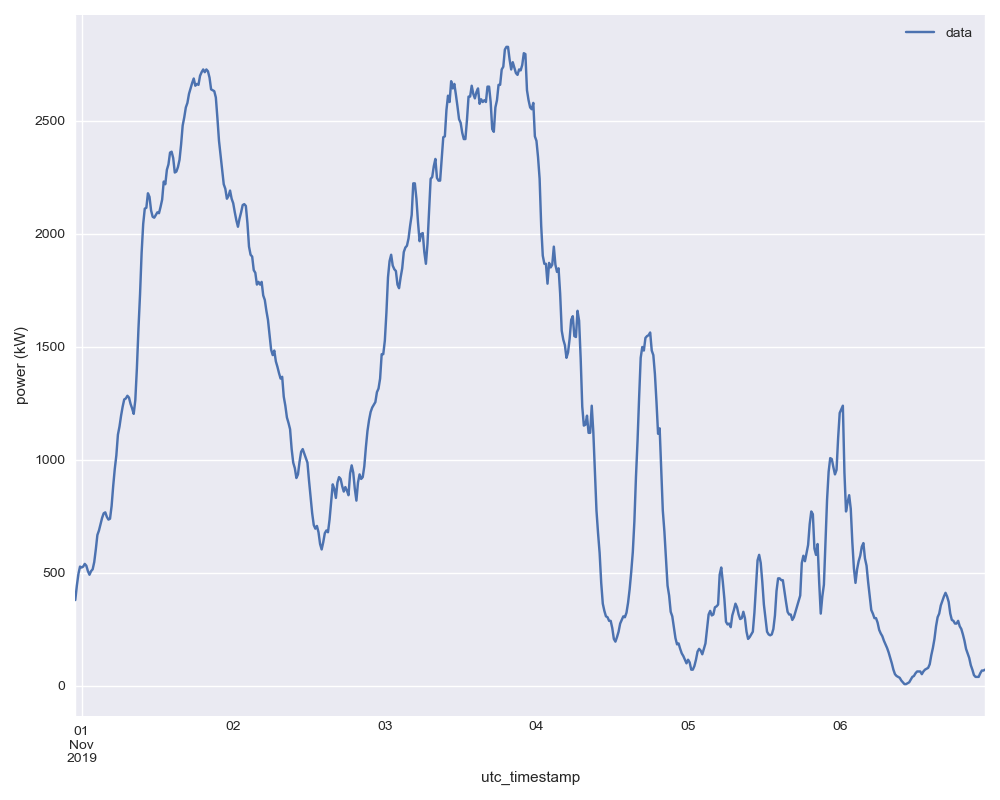

In [55]:
%matplotlib widget
plt.figure(figsize=(10,8))
plt.xlabel('time')
plt.ylabel('power (kW)')
data.plot(label='data')
plt.legend()
plt.tight_layout()

### Operations on time series

#### Window operations

Get the window of 5 hours

In [56]:
window = data.rolling(window=20)
window

Rolling [window=20,center=False,axis=0,method=single]

In [57]:
rolling_mean = window.mean()

In [58]:
rolling_mean.plot(label='mean window 5h')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [59]:
rolling_mean = window.max()

In [60]:
rolling_mean.plot(label='max window 5h')
plt.legend()
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Rolling from center

In [61]:
window = data.rolling(window=20, center=True)
window

Rolling [window=20,center=True,axis=0,method=single]

In [62]:
rolling_mean = window.mean()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
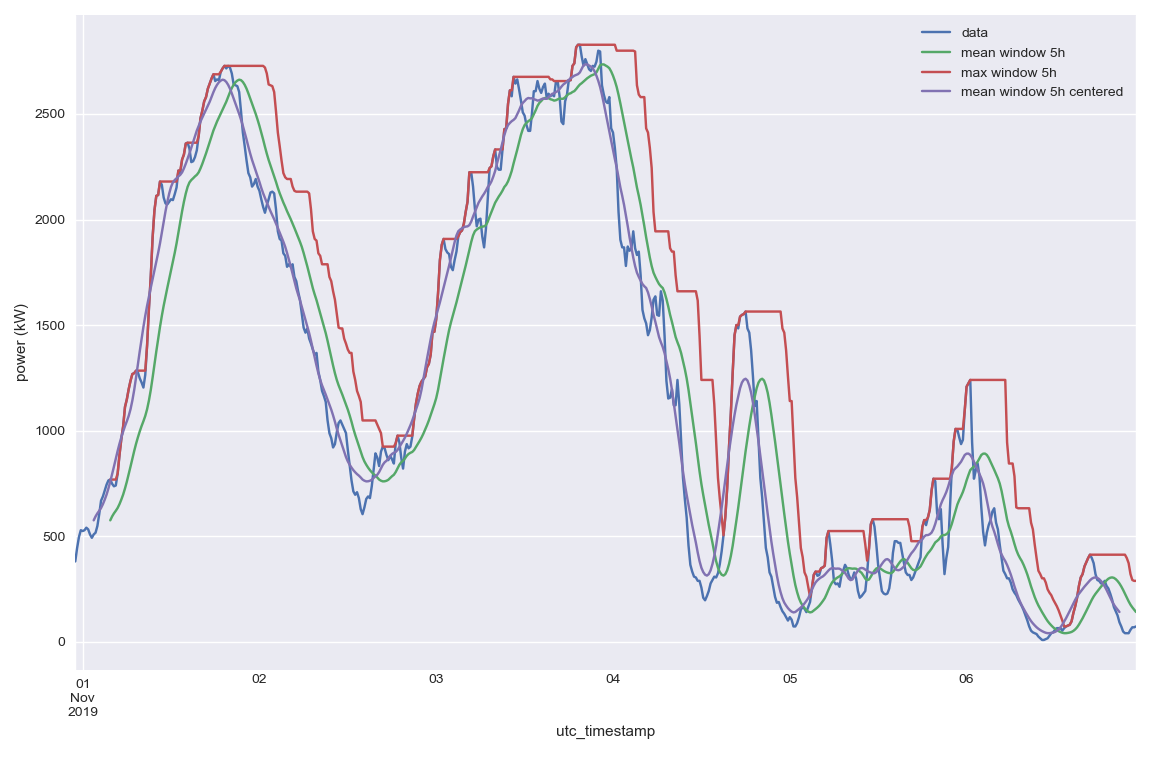

In [63]:
rolling_mean.plot(label='mean window 5h centered')
plt.legend()

* Why is it not so smart to work with center when looking at historical data?
* Its also possible to work with custom index'
* Write your own index class for rolling windows

Weighting is also possible with ```.apply```

In [64]:
window = data.rolling(window=20, center=True, win_type="triang")
window

Window [window=20,center=True,win_type=triang,axis=0,method=single]

In [65]:
rolling_mean = window.mean()

In [66]:
rolling_mean.plot(label='mean window 5h triangled')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### Window statistics 

In [71]:
plt.figure('test figure')
data.plot(label='data')
data.rolling(window=200, min_periods=1).mean().plot(label='cumulative average')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

or

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
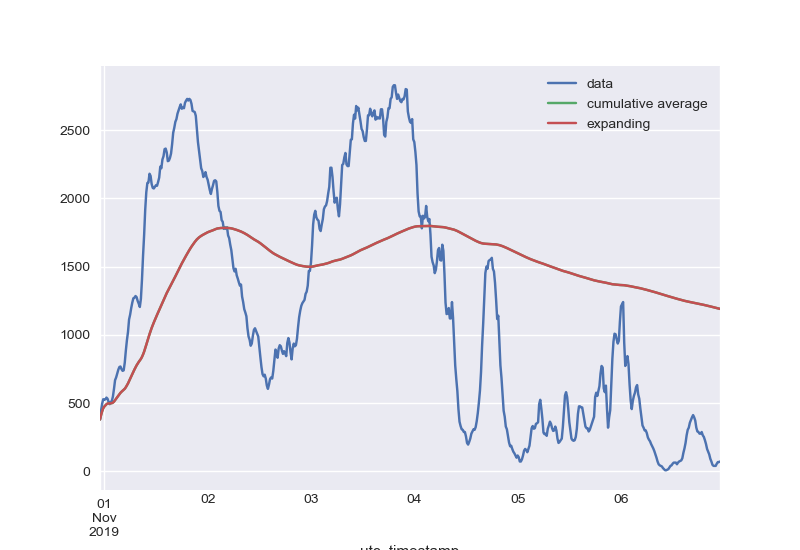

In [68]:
data.expanding(min_periods=1).mean().plot(label='expanding')
plt.legend(loc='best')

#### Custom window operations

In [72]:
# Median absolute deviation
def mad(x):
    return np.abs(x - x.mean()).mean()

In [73]:
data

utc_timestamp
2019-10-31 23:00:00+00:00    380.0
2019-10-31 23:15:00+00:00    444.0
2019-10-31 23:30:00+00:00    496.0
2019-10-31 23:45:00+00:00    528.0
2019-11-01 00:00:00+00:00    524.0
                             ...  
2019-11-06 22:00:00+00:00     40.0
2019-11-06 22:15:00+00:00     56.0
2019-11-06 22:30:00+00:00     68.0
2019-11-06 22:45:00+00:00     68.0
2019-11-06 23:00:00+00:00     72.0
Name: AT_wind_onshore_generation_actual, Length: 577, dtype: float64

In [74]:
window = data.rolling(window=20,center=True)

In [75]:
rolling_custom = window.apply(mad, raw=True, )

In [77]:
plt.clf()
plt.figure('custom window')
data.plot()
rolling_custom.plot(label='difference')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Lets take a look in a datascience project with time series.

Time Series with stock data

In [202]:
data.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-07-31  54.105000  55.342499  52.825001  53.259998  52.125317  277125600
2019-08-01  53.474998  54.507500  51.685001  52.107498  50.997368  216071600
2019-08-02  51.382500  51.607498  50.407501  51.005001  49.918358  163448400
2019-08-05  49.497501  49.662498  48.145000  48.334999  47.305237  209572000
2019-08-06  49.077499  49.517502  48.509998  49.250000  48.200745  143299200

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date', ylabel='stock price (EUR)'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
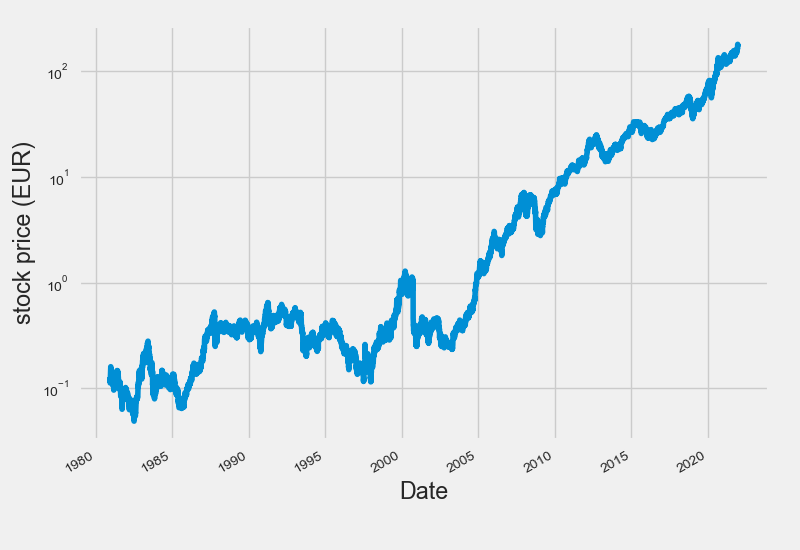

In [204]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib widget
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
data = pdr.get_data_yahoo("AAPL", start="1980-08-01", end="2021-12-16")
plt.ylabel("stock price (EUR)")
plt.tight_layout()
data["Close"].plot(logy=True)

As you could see that plots don't look so bad. And that's when I like to recommend seaborn.

# Working with large data sets

But what's the definition of large? Or big?
A common definition is:
* Large data $\rightarrow$ if the data doesn't fit into the memory.
* Big Data $\rightarrow$ if the data is so big that it has to be handled by clusters to be analyzed


## Use chunks when reading csvs

In [78]:
chunks = pd.read_csv('sample_data/car_measurements.csv', chunksize=500000)

In [79]:
chunks

The dataset will be read in chunks of 500000 lines

As you can see, the memory didn't fill up so far

In [80]:
type(chunks)

pandas.io.parsers.readers.TextFileReader

df_chunk is not a ```DataFrame``` but a TextFileReader object that can be used as a generator.

In [81]:
chunk_list = []  # append each chunk df here 

# Chunks in DataFrame format
for chunk in chunks: 
    
    # Apply something to do to the chunk
    chunk_filter = chunk.mean(numeric_only=True).mean()
    
    # Append the chunk result
    chunk_list.append(chunk_filter)
    

How do I know how column names and structure is prior loading?

In [82]:
head_df = pd.read_csv('sample_data/car_measurements.csv', nrows=10)

In [83]:
head_df

OP  time in s  i_a in A  i_b in A  i_c in A  u_a in V  u_b in V  u_c in V  \
0   1   0.000000  1.765625  3.453125  0.937500 -0.322917 -0.677083  1.000000   
1   1   0.000001  1.578125  3.421875  0.859375 -0.177083 -0.750000  0.927083   
2   1   0.000002  1.578125  3.562500  0.750000 -0.114583 -0.854167  0.968750   
3   1   0.000003  1.765625  3.671875  0.640625 -0.104167 -0.822917  0.927083   
4   1   0.000004  1.656250  3.671875  0.609375 -0.125000 -0.802083  0.927083   
5   1   0.000005  1.609375  3.578125  0.671875 -0.083333 -0.843750  0.927083   
6   1   0.000006  1.531250  3.812500  0.718750 -0.052083 -0.770833  0.822917   
7   1   0.000007  1.281250  4.031250  0.703125 -0.083333 -0.875000  0.958333   
8   1   0.000008  1.343750  4.171875  0.703125 -0.250000 -0.906250  1.156250   
9   1   0.000009  1.312500  4.218750  0.484375 -0.447917 -0.864583  1.312500   

   u_dc in V  epsilon_el in rad  s_n  
0   294.2358          -2.403804  NaN  
1   294.2249          -2.403765  NaN  
2   294.2141          -2.403726  NaN  
3   294.2032          -2.403687  NaN  
4   294.1923          -2.403648  NaN  
5   294.1814          -2.403609  NaN  
6   294.1705          -2.403570  NaN  
7   294.1596          -2.403531  NaN  
8   294.1487          -2.403492  NaN  
9   294.1378          -2.403454  NaN

## Filter while reading in

In [84]:
chunks = pd.read_csv('sample_data/car_measurements.csv', chunksize=500000, usecols=['time in s', 'i_a in A'])

In [85]:
chunk_list = []  # append each chunk df here 

# Chunks in DataFrame format
for chunk in chunks: 
    
    # Apply something to do to the chunk
    chunk_filter = chunk.mean(numeric_only=True).mean()
    
    # Append the chunk result
    chunk_list.append(chunk_filter)
    

In [86]:
chunk_list

[1.584734734375,
 1.7765222244554868,
 0.8510803467191578,
 1.6336608603903886,
 2.1517037007644255,
 1.846273632065519,
 1.0138662643428642,
 1.619644844745219,
 0.8768718307626686,
 1.6157936324122784,
 0.7225395336592246,
 1.7550700396834715,
 0.0590953536021846,
 1.8467520487097697,
 -1.1430145495362825,
 1.5890837668906643,
 -1.4484754485736313,
 1.526450398176094,
 -0.43689079659412144,
 1.3380699251352717,
 0.5927626152066551,
 1.8435578197202538,
 1.7930660527602986,
 1.7344756629925273,
 1.8371333357898034,
 1.4428741765196187,
 1.8425982753340038,
 1.2381469083251464,
 0.6923701174615641,
 1.0561306772407284,
 0.6343849158193241,
 1.2047759106110099,
 0.533520394958235,
 1.324687149679544,
 1.1493159988669288,
 2.1443823486736218,
 1.789242353493555,
 1.3991996664742488,
 2.0944319012299246,
 1.96639952718045,
 1.036847339595276,
 1.8453805636631633,
 1.9081417105503584,
 1.7485147010237587,
 0.9334738615052408,
 1.485696880388282,
 -0.20443235188756004,
 1.5837164462675262,


Do never append data to a DataFrame inside this loop. Always append to lists due to unnecessary copy operations.

Less memory is needed

## Change type of columns to type with lower memory footprint

Define a dtype befor reading:

In [87]:
df_dtype = {
        "time in s": np.float32,
        "i_a in A": np.float32,
}

In [88]:
df = pd.read_csv('sample_data/car_measurements.csv', dtype=df_dtype, usecols=list(df_dtype.keys()))

In [89]:
df.head()

time in s  i_a in A
0   0.000000  1.765625
1   0.000001  1.578125
2   0.000002  1.578125
3   0.000003  1.765625
4   0.000004  1.656250

## Use Dask

If you want to make aggregations and grouping or transformations of the data, you'll need the whole dataset and can't operate on chunks

In [90]:
import dask.dataframe as dd

In [91]:
ddf = dd.read_csv('sample_data/car_measurements.csv')


In [92]:
ddf.head()

OP  time in s  i_a in A  i_b in A  i_c in A  u_a in V  u_b in V  u_c in V  \
0   1   0.000000  1.765625  3.453125  0.937500 -0.322917 -0.677083  1.000000   
1   1   0.000001  1.578125  3.421875  0.859375 -0.177083 -0.750000  0.927083   
2   1   0.000002  1.578125  3.562500  0.750000 -0.114583 -0.854167  0.968750   
3   1   0.000003  1.765625  3.671875  0.640625 -0.104167 -0.822917  0.927083   
4   1   0.000004  1.656250  3.671875  0.609375 -0.125000 -0.802083  0.927083   

   u_dc in V  epsilon_el in rad  s_n  
0   294.2358          -2.403804  NaN  
1   294.2249          -2.403765  NaN  
2   294.2141          -2.403726  NaN  
3   294.2032          -2.403687  NaN  
4   294.1923          -2.403648  NaN

In [93]:
ddf.mean()

Dask Series Structure:
npartitions=1
OP           float64
u_dc in V        ...
dtype: float64
Dask Name: dataframe-mean, 156 tasks

Dask is lazy. If you don't ask for something it won't compute it. So use ```compute()```

In [94]:
ddf.sum()

Dask Series Structure:
npartitions=1
OP           float64
u_dc in V        ...
dtype: float64
Dask Name: dataframe-sum-agg, 103 tasks

In [95]:
ddf.mean().compute()

OP                    37.500000
time in s              0.249999
i_a in A               2.122413
i_b in A               0.953636
i_c in A               2.520673
u_a in V              -0.752138
u_b in V              -0.488140
u_c in V               1.240278
u_dc in V            293.964973
epsilon_el in rad     -0.022666
s_n                    4.553860
dtype: float64

In [96]:
ddf.describe()

Dask DataFrame Structure:
                    OP time in s i_a in A i_b in A i_c in A u_a in V u_b in V u_c in V u_dc in V epsilon_el in rad      s_n
npartitions=1                                                                                                              
               float64   float64  float64  float64  float64  float64  float64  float64   float64           float64  float64
                   ...       ...      ...      ...      ...      ...      ...      ...       ...               ...      ...
Dask Name: describe-numeric, 2129 tasks

In [97]:
ddf.describe().compute()

OP     time in s      i_a in A      i_b in A      i_c in A  \
count  3.700000e+07  3.700000e+07  3.700000e+07  3.700000e+07  3.700000e+07   
mean   3.750000e+01  2.499995e-01  2.122413e+00  9.536360e-01  2.520673e+00   
std    2.136001e+01  1.443376e-01  1.261679e+02  1.256352e+02  1.270348e+02   
min    1.000000e+00  0.000000e+00 -2.982656e+02 -3.015313e+02 -3.067500e+02   
25%    1.900000e+01  1.817547e-01 -3.078125e+01 -3.696875e+01 -3.145313e+01   
50%    3.800000e+01  3.181900e-01  2.465625e+01  2.821875e+01  2.367188e+01   
75%    5.600000e+01  4.182168e-01  1.356875e+02  1.339063e+02  1.335469e+02   
max    7.400000e+01  4.999990e-01  3.054531e+02  3.002188e+02  3.122813e+02   

           u_a in V      u_b in V      u_c in V     u_dc in V  \
count  3.700000e+07  3.700000e+07  3.700000e+07  3.699470e+07   
mean  -7.521380e-01 -4.881404e-01  1.240278e+00  2.939650e+02   
std    4.063349e+01  3.779285e+01  4.138542e+01  7.730752e-01   
min   -2.067500e+02 -2.052083e+02 -2.060833e+02  2.912669e+02   
25%   -1.416667e+00 -1.166667e+00  3.541667e-01  2.937542e+02   
50%   -1.250000e-01  6.250000e-02  1.802083e+00  2.940706e+02   
75%    7.395833e-01  1.000000e+00  2.947917e+00  2.947452e+02   
max    2.057292e+02  2.043854e+02  2.089792e+02  2.966850e+02   

       epsilon_el in rad           s_n  
count       3.700000e+07  3.699678e+07  
mean       -2.266618e-02  4.553860e+00  
std         1.804559e+00  3.389666e+00  
min        -3.141593e+00  1.000000e+00  
25%        -1.304819e+00  1.000000e+00  
50%         4.044530e-01  8.000000e+00  
75%         1.759218e+00  8.000000e+00  
max         3.141593e+00  8.000000e+00

Other approaches:
* ETL Design for the data. Only keep what is needed from the raw data.
* Write the chunked data to a database
* Apply ETL with with frameworks like PySpark,  export the processed data.
* test if the prcessed data can be fit in the memory as a whole.
* If that's the case again, use pandas
* Consider increasing your RAM.
* Consider working on clusters or externally

## Use dask on clusters

https://docs.dask.org/en/latest/deploying.html

## Sparse data 

Sparse data means a data set where the data is similar most of the time in most dimensions

For example:

In [98]:
arr = np.random.randn(10)

In [99]:
arr[2:-2] = np.nan

In [100]:
arr

array([-1.31316553, -0.60852106,         nan,         nan,         nan,
               nan,         nan,         nan,  1.08218014, -0.48091274])

```pandas``` provides a compressing technique, so that the ```np.nan```, zeros or whatever isn't actually stored in the ```DataFrame```

In [101]:
sparse_series = pd.Series(pd.arrays.SparseArray(arr))

In [102]:
sparse_series

0   -1.313166
1   -0.608521
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8    1.082180
9   -0.480913
dtype: Sparse[float64, nan]

Please notice the data type: The second entry (```nan```) means this dtype isn't actually stored

#### Let's use a larger example to see how the compression affects the memory usage.

In [103]:
df = pd.DataFrame(np.random.randn(10000, 4))

In [104]:
df.iloc[:9998] = np.nan

In [105]:
df_compressed = df.astype(pd.SparseDtype("float", np.nan))

In [106]:
df_compressed.head()

0   1   2   3
0 NaN NaN NaN NaN
1 NaN NaN NaN NaN
2 NaN NaN NaN NaN
3 NaN NaN NaN NaN
4 NaN NaN NaN NaN

In [107]:
df

0         1         2         3
0          NaN       NaN       NaN       NaN
1          NaN       NaN       NaN       NaN
2          NaN       NaN       NaN       NaN
3          NaN       NaN       NaN       NaN
4          NaN       NaN       NaN       NaN
...        ...       ...       ...       ...
9995       NaN       NaN       NaN       NaN
9996       NaN       NaN       NaN       NaN
9997       NaN       NaN       NaN       NaN
9998 -1.384915  1.710226  0.377846 -0.370224
9999  0.915257  0.884540 -0.229895 -0.078051

[10000 rows x 4 columns]

In [108]:
df_compressed.dtypes

0    Sparse[float64, nan]
1    Sparse[float64, nan]
2    Sparse[float64, nan]
3    Sparse[float64, nan]
dtype: object

Check the density of the ```DataFrame```

In [109]:
df_compressed.sparse.density

0.0002

In [110]:
df.memory_usage().sum() # bytes

320128

In [111]:
df_compressed.memory_usage().sum() #bytes

224

But to save such datasets, use hdf5 or parquet, pickle

# Work with the output data in other Libraries:

## Write to ```numpy```, ```dict```

In [112]:
df = pd.DataFrame(data={'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}, 
                  index=['a', 'b', 'c'], dtype="Int64")

In [113]:
df

A  B  C
a  1  4  7
b  2  5  8
c  3  6  9

In [114]:
df.to_numpy()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]], dtype=object)

If you like to preserve dtype info, use:

In [115]:
df.to_records()

rec.array([('a', 1, 4, 7), ('b', 2, 5, 8), ('c', 3, 6, 9)],
          dtype=[('index', 'O'), ('A', 'O'), ('B', 'O'), ('C', 'O')])

In [116]:
df.to_dict()

{'A': {'a': 1, 'b': 2, 'c': 3},
 'B': {'a': 4, 'b': 5, 'c': 6},
 'C': {'a': 7, 'b': 8, 'c': 9}}

In [117]:
dd.from_pandas(df, npartitions=3)

Dask DataFrame Structure:
                   A      B      C
npartitions=2                     
a              Int64  Int64  Int64
b                ...    ...    ...
c                ...    ...    ...
Dask Name: from_pandas, 2 tasks

In [118]:
dd.from_pandas(df, npartitions=3).compute()

A  B  C
a  1  4  7
b  2  5  8
c  3  6  9

## Use a ```DataFrame``` with sklearn

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [120]:
penguins = pd.read_csv('sample_data/penguins_lter.csv')

In [121]:
penguins

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [122]:
penguins_cropped = penguins[['Species','Culmen Length (mm)', 'Culmen Depth (mm)']].dropna()

In [123]:
penguins_cropped

Species  Culmen Length (mm)  \
0    Adelie Penguin (Pygoscelis adeliae)                39.1   
1    Adelie Penguin (Pygoscelis adeliae)                39.5   
2    Adelie Penguin (Pygoscelis adeliae)                40.3   
4    Adelie Penguin (Pygoscelis adeliae)                36.7   
5    Adelie Penguin (Pygoscelis adeliae)                39.3   
..                                   ...                 ...   
338    Gentoo penguin (Pygoscelis papua)                47.2   
340    Gentoo penguin (Pygoscelis papua)                46.8   
341    Gentoo penguin (Pygoscelis papua)                50.4   
342    Gentoo penguin (Pygoscelis papua)                45.2   
343    Gentoo penguin (Pygoscelis papua)                49.9   

     Culmen Depth (mm)  
0                 18.7  
1                 17.4  
2                 18.0  
4                 19.3  
5                 20.6  
..                 ...  
338               13.7  
340               14.3  
341               15.7  
342               14.8  
343               16.1  

[342 rows x 3 columns]

In [124]:
X = penguins_cropped.select_dtypes(exclude=['object'])
y = penguins_cropped.Species

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5)

# Initialize a model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit and predict
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

In [125]:
accuracy_score(y_test, predictions)


0.970873786407767

In [126]:
predictions

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Gentoo penguin (Pygoscelis papua)',
       'Gentoo penguin (Pygoscelis papua)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)',
       'Gentoo penguin (Pygoscelis papua)',
       'Gentoo penguin (Pygoscelis papua)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (Pygoscelis adeliae)',
       'Adelie Penguin (

## TensorFlow 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

tf.enable_eager_execution()

training_df: pd.DataFrame = pd.DataFrame(
    data={
        'feature1': np.random.rand(30),
        'feature2': np.random.rand(30),
        'feature3': np.random.rand(30),
        'target': np.random.randint(0, 3, 30)
    }
)
features = ['feature_a', 'feature_b', 'feature_c']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')


# Beautiful Plots with ```seaborn```

https://seaborn.pydata.org/

In [1]:
import seaborn as sns
sns.set_theme()

Seaborn holds a lot of data in datasets and is fitting the usual pandas operations

In [2]:
penguins = sns.load_dataset("penguins")

https://github.com/mwaskom/seaborn-data

In [4]:
type(penguins)

pandas.core.frame.DataFrame

In [5]:
penguins.dropna()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
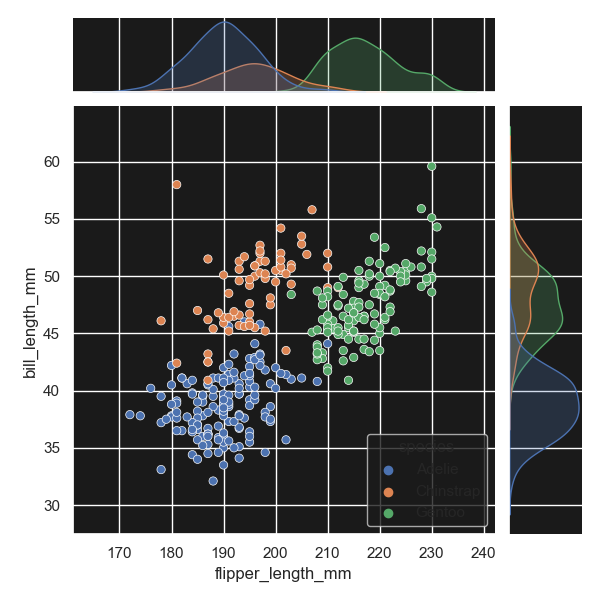

In [47]:
%matplotlib widget
sns.set_style('darkgrid', {'axes.facecolor': '.1'})
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
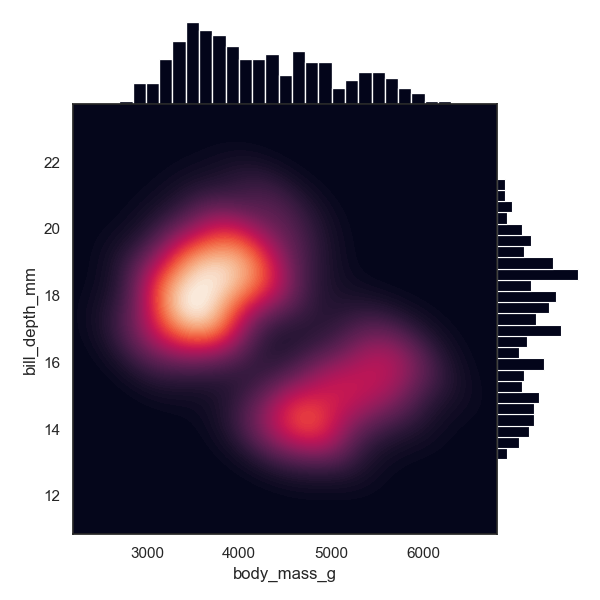

In [7]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
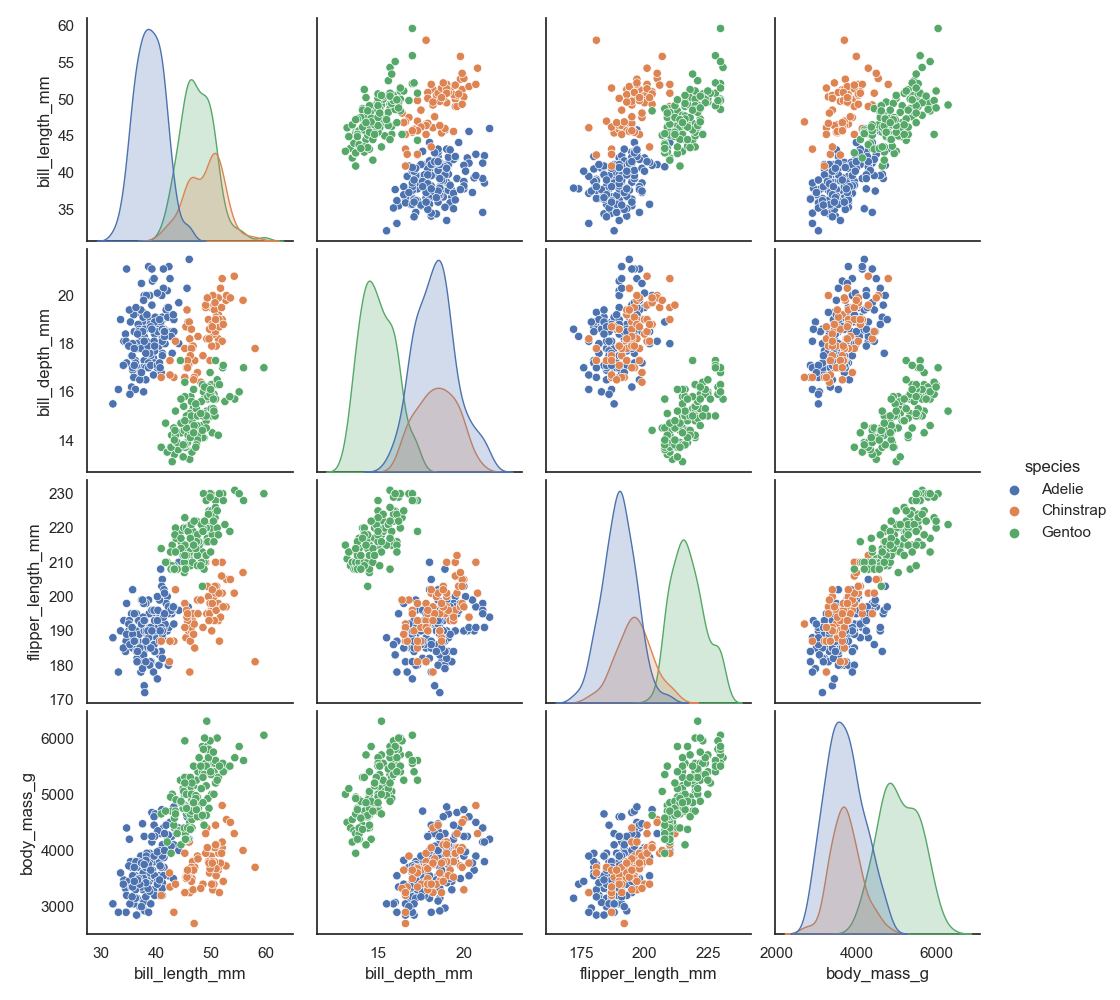

In [8]:
sns.pairplot(data=penguins, hue="species")


In [9]:
# Load an example dataset
tips = sns.load_dataset("tips")

In [10]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
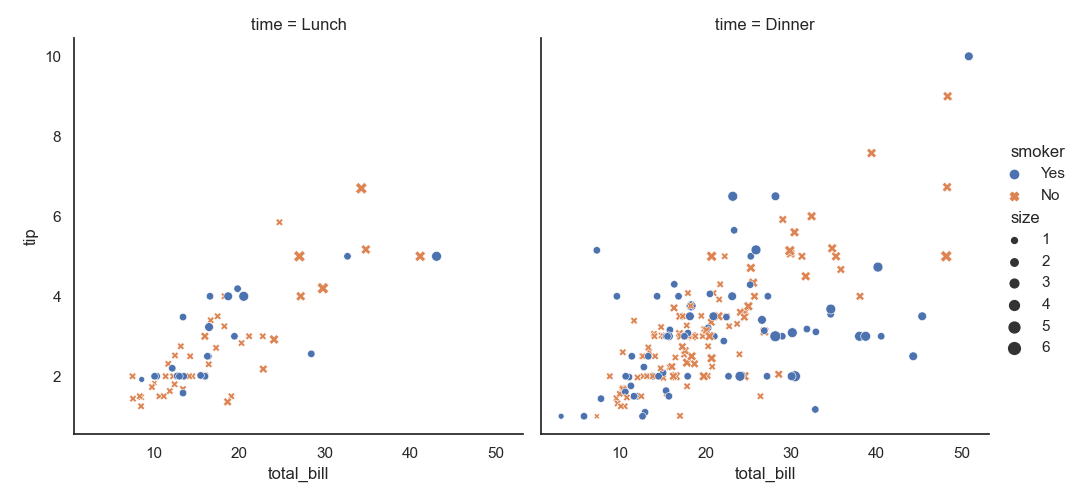

In [11]:
%matplotlib widget
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(10,8))

sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size"
)

In [44]:
sns.set_style('darkgrid', {'axes.facecolor': '.9'})

In [13]:
dots = sns.load_dataset("dots")

In [14]:
dots

align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
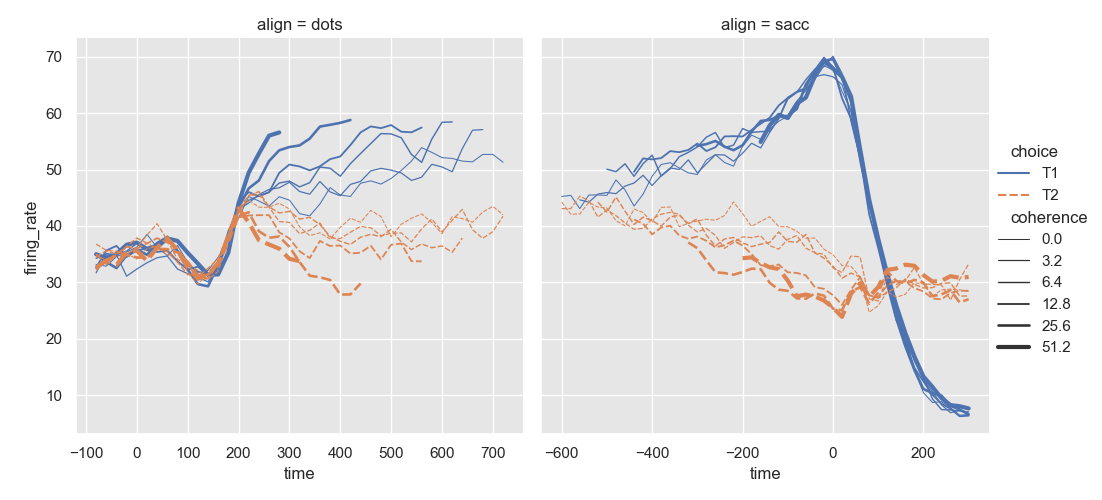

In [45]:
dots = sns.load_dataset("dots")

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [16]:
dots

align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
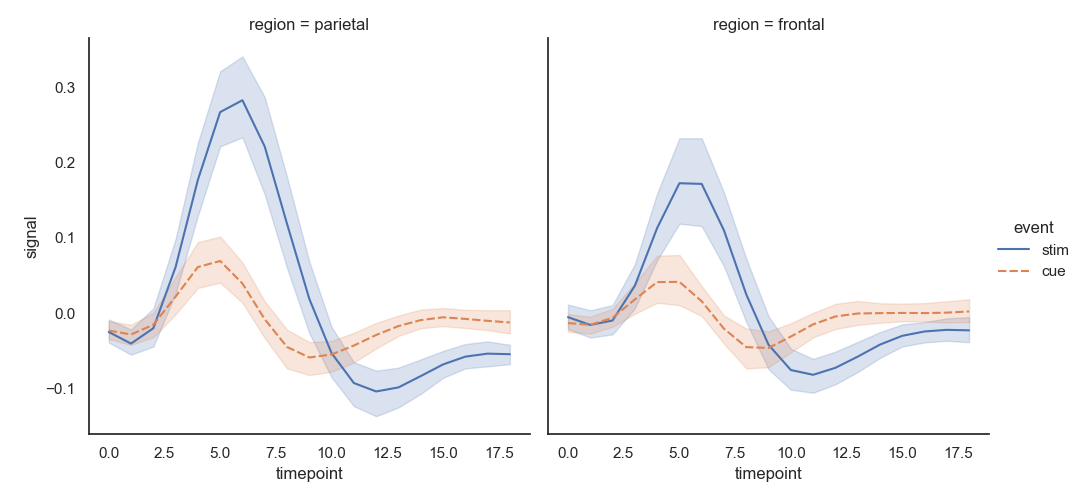

In [17]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
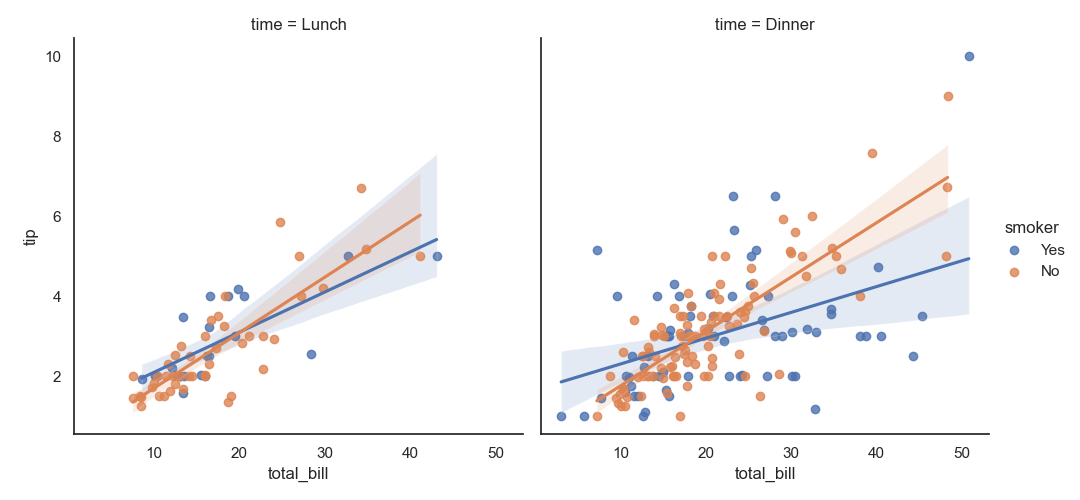

In [18]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
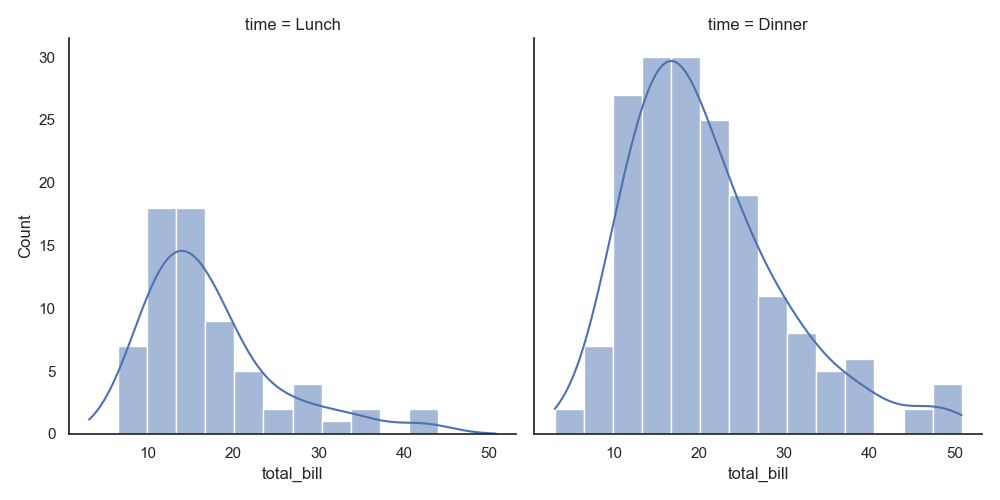

In [19]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
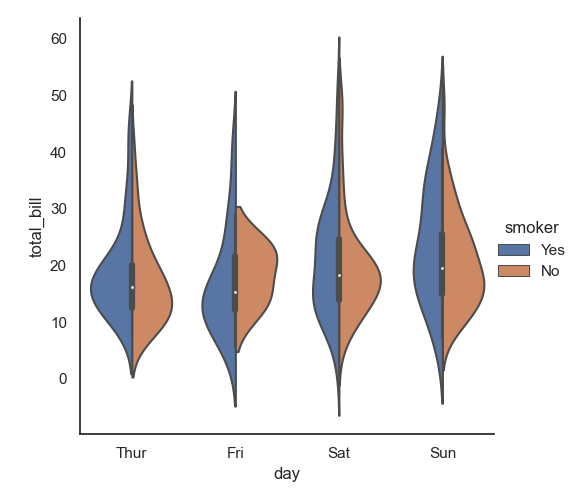

In [20]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)


In [22]:
flights_long

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

<AxesSubplot:xlabel='year', ylabel='month'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
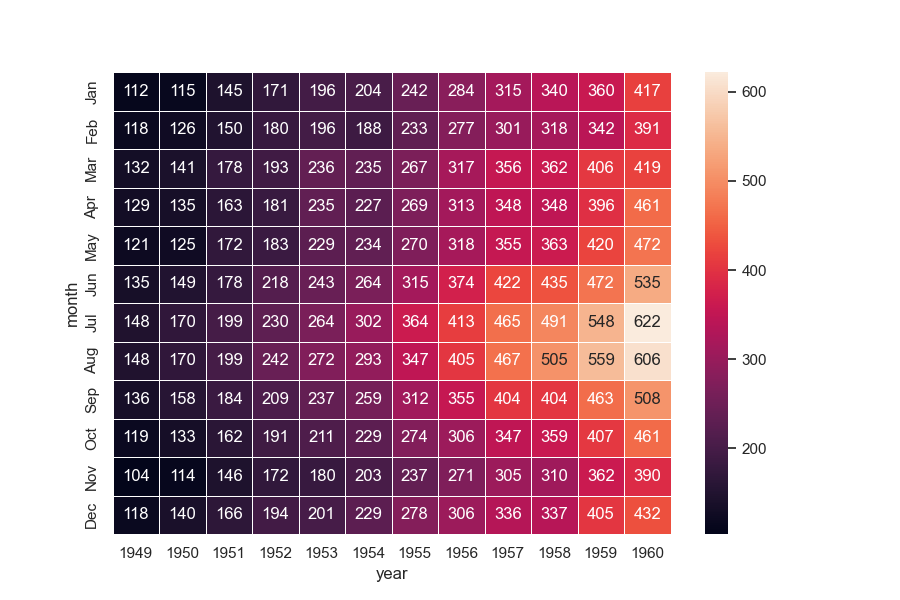

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [26]:
df

network           1                     5                     6             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1         55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2         60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3         18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4         -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219   0.017912 -25.305094 -75.461159 -70.289261   
916      -33.554138 -38.605621 -32.935612 -21.783203 -16.198238 -34.893780   
917      -78.539566 -74.197189 -32.800556 -37.021500   2.098941 -18.581594   
918     -103.235825 -98.744286 -14.330512 -17.224781  -3.007454 -42.672840   
919      -36.288868 -10.762070  26.558777  21.377319   9.652065  12.693388   

network                                7             ...         13  \
node             2                     1             ...          2   
hemi            lh         rh         lh         rh  ...         rh   
0       -47.664265  12.284122   1.566538 -13.042585  ...  14.738475   
1        10.269546  31.275831 -26.309488 -18.077026  ...  23.792282   
2        -5.314236   2.372976  -7.342168 -24.550989  ...   8.968520   
3        32.634335  45.825409 -47.632999  -6.580215  ...  19.627728   
4       -33.975418 -24.149668  -6.315651 -29.344135  ...  55.853088   
..             ...        ...        ...        ...  ...        ...   
915     -13.119029  -5.194376 -56.022263 -24.290606  ... -19.436220   
916      16.504656  13.005379  26.230785   4.764211  ...  16.711153   
917      11.386637   3.676295  52.871113  -3.970096  ...  45.261150   
918       1.581095 -38.023777  37.736561   4.872248  ...  33.483253   
919     -24.773617 -62.247086  -4.883728 -49.077343  ...  -8.466401   

network                               17                                   \
node             3          4          1                     2              
hemi            rh         rh         lh         rh         lh         rh   
0       -16.853010 -34.217819 -21.734550   1.028253   7.791784  68.903725   
1         8.927007 -19.732401 -13.035799  46.381824 -15.752450  31.000332   
2         1.413584  -4.955075  26.033442  34.212200   1.326110 -22.580757   
3        49.208748   1.661293  55.297466   4.255006  -2.420144  12.098393   
4        46.737320   4.586625  43.067562  52.219875  28.232882 -11.719750   
..             ...        ...        ...        ...        ...        ...   
915      15.894722  22.195951  76.179489  51.934669  -6.614513  -6.690762   
916      17.339653  13.682954  50.962399  13.696922  63.503616  57.401176   
917      37.007389  29.753304  43.800747   8.144480  47.281460  70.499649   
918      37.434860 -14.403917  46.674419  40.954796   0.877180  37.577152   
919      23.855883  48.888733 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 38 columns]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
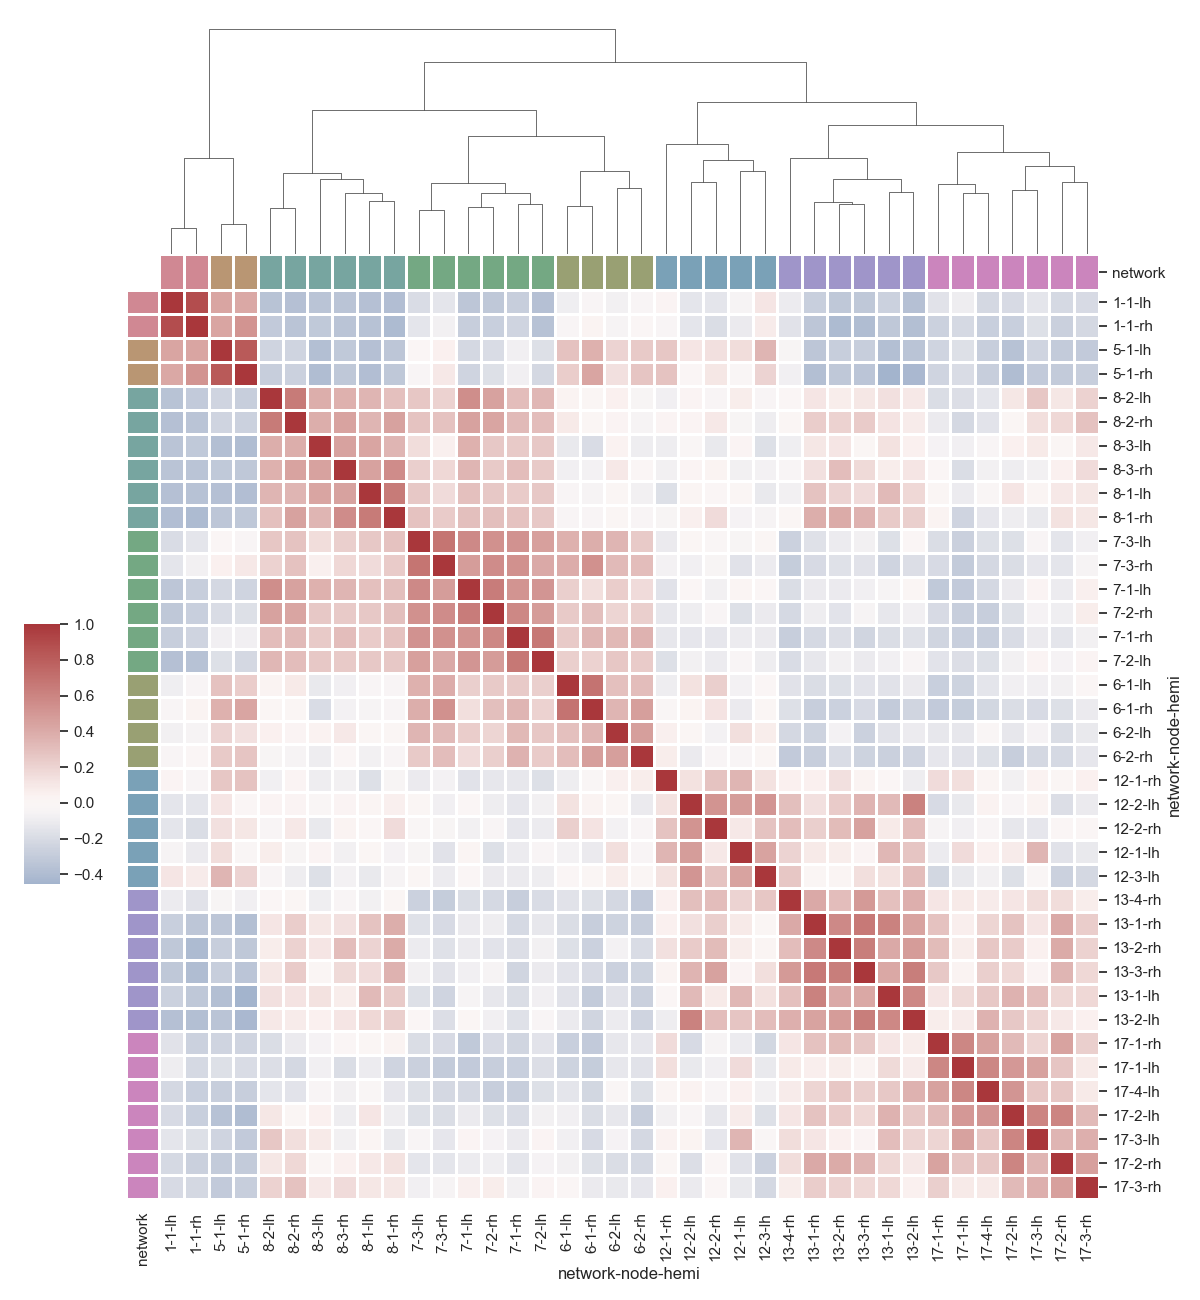

In [25]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

# HDF5

## Create it

In [30]:
import numpy as np
import pandas as pd
from pandas import HDFStore

hdf = HDFStore('hdf_file.h5')

In [33]:
hdf

<class 'pandas.io.pytables.HDFStore'>
File path: hdf_file.h5

In [32]:
df = pd.DataFrame(np.random.rand(5,3), columns=('A','B','C'))# put the dataset in the storage
hdf.put('d1', df, format='table', data_columns=True)

In [34]:
hdf['d1']

A         B         C
0  0.903948  0.023036  0.016493
1  0.344902  0.645183  0.008474
2  0.905750  0.424968  0.467089
3  0.115168  0.967821  0.256668
4  0.102776  0.033149  0.792902

In [35]:
hdf['d1'].shape

(5, 3)

In [36]:
hdf.append('d1',pd.DataFrame(np.random.rand(5,3), 
           columns=('A','B','C')), 
           format='table', data_columns=True)
hdf.close()# closes the file

In [37]:
hdf

<class 'pandas.io.pytables.HDFStore'>
File path: hdf_file.h5

## Read it

In [38]:
from pandas import read_hdf
# this query selects the columns A and B# where the values of A is greather than 0.5
hdf = read_hdf('hdf_file.h5','d1',where=['A>.5'], columns=['A','B'])

ValueError: The file 'hdf_file.h5' is already opened, but not in read-only mode (as requested).

In [39]:
print(hdf)

<class 'pandas.io.pytables.HDFStore'>
File path: hdf_file.h5



## Add more data

In [40]:
hdf =HDFStore('hdf_file.h5')
hdf.put('tables/t1', pd.DataFrame(np.random.rand(20,5)))
hdf.put('tables/t2', pd.DataFrame(np.random.rand(10,3)))
hdf.put('new_tables/t1', pd.DataFrame(np.random.rand(15,2)))

In [41]:
print(hdf)

<class 'pandas.io.pytables.HDFStore'>
File path: hdf_file.h5



In [42]:
hdf.keys()

['/d1', '/tables/t1', '/tables/t2', '/new_tables/t1']

In [43]:
hdf['/tables/t1']

0         1         2         3         4
0   0.072952  0.172167  0.236046  0.998135  0.378980
1   0.176748  0.461259  0.254665  0.488900  0.914029
2   0.724302  0.417255  0.180323  0.478956  0.439383
3   0.531320  0.193537  0.240355  0.663146  0.011681
4   0.382259  0.929321  0.680336  0.071787  0.963733
5   0.160305  0.035027  0.885084  0.593510  0.548645
6   0.354521  0.512058  0.389712  0.843079  0.410436
7   0.312408  0.659105  0.776597  0.947746  0.061905
8   0.994989  0.015531  0.511354  0.103569  0.473220
9   0.689045  0.254750  0.808113  0.111524  0.312242
10  0.374350  0.485732  0.028414  0.250954  0.542515
11  0.298364  0.779336  0.375444  0.863047  0.102726
12  0.005427  0.996039  0.126454  0.135958  0.146728
13  0.554944  0.030413  0.712304  0.371181  0.288618
14  0.411949  0.852415  0.126308  0.019936  0.795558
15  0.767054  0.155978  0.475023  0.545500  0.069375
16  0.420501  0.204836  0.606631  0.485071  0.183254
17  0.493467  0.878661  0.933409  0.001621  0.170191
18  0.424344  0.324967  0.946084  0.861181  0.206733
19  0.634105  0.924197  0.591154  0.674969  0.174843

In [ ]:
from numba import jit
import random

@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples